# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [208]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [209]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [262]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
dates = []
coordinates =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Grab the country code with the city name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        # Add the country code to a list
        countries.append(country)
        # Add coordinates to a list that corresponds with the cities
        coordinates.append(lat_lng)
        
# Print the city count to confirm sufficient count
print(len(cities))

608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [263]:
# Create count of cities to increment as we loop through longitude and latitude
city_count = 0

# Create new data frame for weather api data
cities_weather = pd.DataFrame()

# Loop through coordinates
for coordinate in coordinates:
    print("Currently checking the weather for " + cities[city_count])

    # Grab the longitude and latitude
    current_lat = coordinate[0]
    current_long = coordinate[1]  

    # Create the api request
    base_url = "https://api.openweathermap.org/data/2.5/weather?"
    params = {
        "lat" : current_lat,
        "lon" : current_long,
        "appid" : weather_api_key,
        "units" : "imperial"
    }
    city_weather = requests.get(base_url, params=params)

    weather_data = city_weather.json()

    # Add the weather data and city data to the city_weather dataframe
    cities_weather.loc[city_count, "City"] = cities[city_count].capitalize()
    cities_weather.loc[city_count, "Lat"] = current_lat
    cities_weather.loc[city_count, "Lng"] = current_long
    cities_weather.loc[city_count, "Max Temp"] = weather_data["main"]["temp_max"]
    cities_weather.loc[city_count, "Humidity"] = weather_data["main"]["humidity"]
    cities_weather.loc[city_count, "Cloudliness"] = weather_data["clouds"]["all"]
    cities_weather.loc[city_count, "Wind Speed"] = weather_data["wind"]["speed"]
    cities_weather.loc[city_count, "Country"] = countries[city_count].upper()
    current_date = weather_data["dt"] + weather_data["timezone"]
    cities_weather.loc[city_count, "Date"] = current_date

    # Increment the city count
    city_count = city_count + 1

# Display the final table of city and weather data
display(cities_weather)

Currently checking the weather for albany
Currently checking the weather for progreso
Currently checking the weather for comodoro rivadavia
Currently checking the weather for luderitz
Currently checking the weather for yangambi
Currently checking the weather for barrow
Currently checking the weather for amderma
Currently checking the weather for tigre
Currently checking the weather for beroroha
Currently checking the weather for yellowknife
Currently checking the weather for ussel
Currently checking the weather for zlatoust
Currently checking the weather for ushuaia
Currently checking the weather for saint george
Currently checking the weather for punta arenas
Currently checking the weather for boende
Currently checking the weather for englewood
Currently checking the weather for illoqqortoormiut
Currently checking the weather for mahon
Currently checking the weather for bluff
Currently checking the weather for camacha
Currently checking the weather for rikitea
Currently checking the w

Currently checking the weather for touros
Currently checking the weather for cherskiy
Currently checking the weather for chara
Currently checking the weather for geraldton
Currently checking the weather for yuncheng
Currently checking the weather for gulshat
Currently checking the weather for umm lajj
Currently checking the weather for brae
Currently checking the weather for kaspiyskiy
Currently checking the weather for waingapu
Currently checking the weather for sistranda
Currently checking the weather for louisbourg
Currently checking the weather for bosaso
Currently checking the weather for piacabucu
Currently checking the weather for srednekolymsk
Currently checking the weather for marquette
Currently checking the weather for xiuyan
Currently checking the weather for chapada dos guimaraes
Currently checking the weather for mundo nuevo
Currently checking the weather for port blair
Currently checking the weather for bambous virieux
Currently checking the weather for hervey bay
Curren

Currently checking the weather for frankenberg
Currently checking the weather for panchagarh
Currently checking the weather for port hardy
Currently checking the weather for altay
Currently checking the weather for miranda
Currently checking the weather for manzhouli
Currently checking the weather for tabiauea
Currently checking the weather for goderich
Currently checking the weather for hofn
Currently checking the weather for khormuj
Currently checking the weather for mehamn
Currently checking the weather for murmashi
Currently checking the weather for byron bay
Currently checking the weather for salima
Currently checking the weather for tuatapere
Currently checking the weather for micheweni
Currently checking the weather for mandalgovi
Currently checking the weather for meadow lake
Currently checking the weather for kinkala
Currently checking the weather for karakol
Currently checking the weather for novyy urengoy
Currently checking the weather for kelowna
Currently checking the weat

Currently checking the weather for pendleton
Currently checking the weather for lichinga
Currently checking the weather for vila franca do campo
Currently checking the weather for jalu
Currently checking the weather for dangriga
Currently checking the weather for kota
Currently checking the weather for navalmoral de la mata
Currently checking the weather for santa fe
Currently checking the weather for marsa matruh
Currently checking the weather for baniachang
Currently checking the weather for derbent
Currently checking the weather for taywarah
Currently checking the weather for broome
Currently checking the weather for soyo
Currently checking the weather for susanville
Currently checking the weather for vallenar
Currently checking the weather for tha chang
Currently checking the weather for umzimvubu
Currently checking the weather for banjar
Currently checking the weather for padang
Currently checking the weather for birao
Currently checking the weather for manacapuru
Currently checki

,City,Lat,Lng,Max Temp,Humidity,Cloudliness,Wind Speed,Country,Date
0,Albany,-64.724715,107.207715,8.71,93.0,100.0,21.54,AU,1.650969e+09
1,Progreso,24.641227,-90.523992,77.45,84.0,0.0,14.61,MX,1.650908e+09
2,Comodoro rivadavia,-44.148168,-67.638349,54.50,41.0,100.0,20.45,AR,1.650919e+09
3,Luderitz,-31.317895,0.758280,65.55,67.0,100.0,14.90,NA,1.650929e+09
4,Yangambi,-0.071054,23.789763,69.53,99.0,88.0,2.04,CD,1.650937e+09
...,...,...,...,...,...,...,...,...,...
603,Kalutara,6.663162,79.969598,76.41,87.0,69.0,3.47,LK,1.650950e+09
604,Sirnak,37.535885,42.473748,48.20,70.0,63.0,3.58,TR,1.650941e+09
605,Zhigansk,70.032623,124.432684,7.97,90.0,61.0,3.02,RU,1.650962e+09
606,Iringa,-8.174751,35.825309,57.06,93.0,96.0,4.21,TZ,1.650941e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [264]:
# Export DataFrame to CSV file
import os
os.makedirs('Export', exist_ok=True)
cities_weather.to_csv('Export/City_Weather.csv')

In [240]:
#Describe the table of weather data 
cities_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudliness,Wind Speed,Date
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,6.220000e+02
mean,19.613834,17.149940,56.854325,72.200965,63.604502,11.186608,1.650935e+09
std,36.431665,95.931785,27.690264,20.440396,38.752377,7.990993,2.275829e+04
min,-86.553592,-177.901330,-69.740000,6.000000,0.000000,0.000000,1.650885e+09
25%,-9.055686,-64.772622,39.560000,66.000000,22.000000,4.940000,1.650915e+09
50%,21.864815,26.945681,64.760000,76.000000,81.500000,9.400000,1.650936e+09
75%,48.697663,99.299355,80.100000,86.000000,99.000000,15.745000,1.650954e+09
max,89.980436,179.539658,94.910000,100.000000,100.000000,62.210000,1.650976e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [241]:
# Select cities with humidity less than or equal to 100
cities_weather = cities_weather[cities_weather["Humidity"] <= 100]

In [242]:
#  Get the indices of cities that have humidity over 100%.


In [243]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

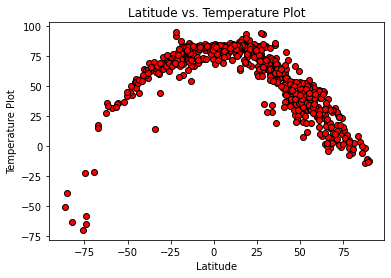

In [249]:
# Select specified data
latitudes = cities_weather["Lat"]
temperature_plot = cities_weather["Max Temp"]

#Create plot
plt.scatter(latitudes, temperature_plot, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature Plot")

plt.show()

## Latitude vs. Humidity Plot

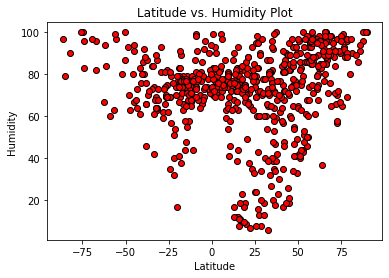

In [247]:
# Select specified data
latitudes = cities_weather["Lat"]
humidity = cities_weather["Humidity"]

#Create plot
plt.scatter(latitudes, humidity, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

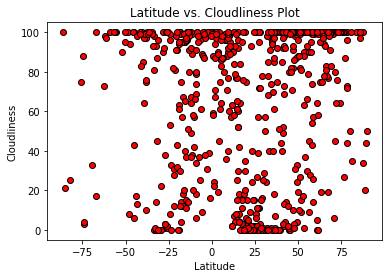

In [250]:
# Select specified data
latitudes = cities_weather["Lat"]
cloudliness = cities_weather["Cloudliness"]

#Create plot
plt.scatter(latitudes, cloudliness, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudliness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness")

plt.show()

## Latitude vs. Wind Speed Plot

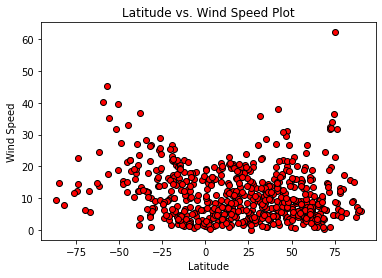

In [251]:
# Select specified data
latitudes = cities_weather["Lat"]
wind_speed = cities_weather["Wind Speed"]

#Create plot
plt.scatter(latitudes, wind_speed, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

## Linear Regression

In [252]:
# Import scipy for linear regression calculations
import scipy.stats as st
from scipy import stats


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.3707416050387589


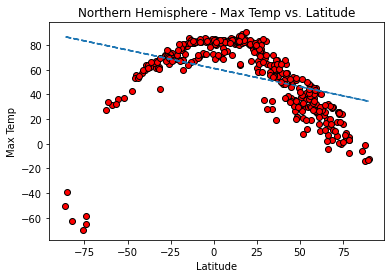

In [253]:
# Select specified data from cities in the Northern Hemisphere
nh_cities = cities_weather[cities_weather["Lng"] >= 0]
latitudes = nh_cities["Lat"]
temperature_plot = nh_cities["Max Temp"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, temperature_plot)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, temperature_plot, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.4400664389424855


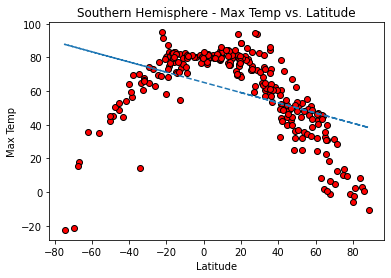

In [255]:
# Select specified data from cities in the Southern Hemisphere
sh_cities = cities_weather[cities_weather["Lng"] <= 0]
latitudes = sh_cities["Lat"]
temperature_plot = sh_cities["Max Temp"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, temperature_plot)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, temperature_plot, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.09631235905376981


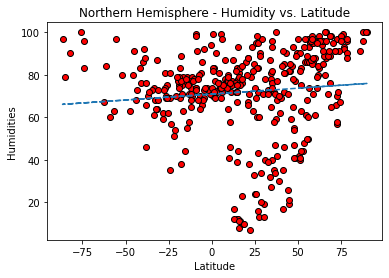

In [256]:
# Select specified data
latitudes = nh_cities["Lat"]
humidities = nh_cities["Humidity"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, humidities)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, humidities, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidities")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.03847524817242652


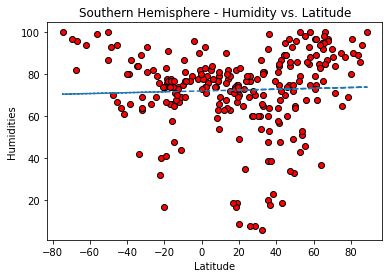

In [257]:
# Select specified data
latitudes = sh_cities["Lat"]
humidities = sh_cities["Humidity"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, humidities)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, humidities, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidities")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.05459852387210211


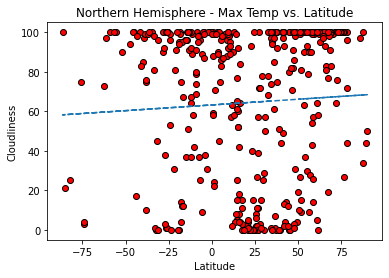

In [258]:
# Select specified data
latitudes = nh_cities["Lat"]
cloudliness = nh_cities["Cloudliness"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, cloudliness)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, cloudliness, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.14940162688041864


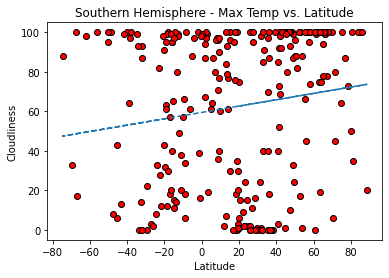

In [259]:
# Select specified data
latitudes = sh_cities["Lat"]
cloudliness = sh_cities["Cloudliness"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, cloudliness)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, cloudliness, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.20415494017459773


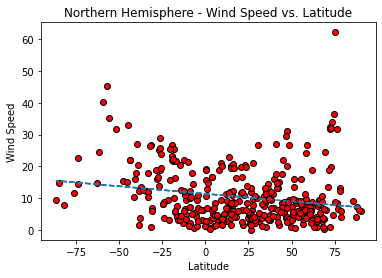

In [260]:
# Select specified data
latitudes = nh_cities["Lat"]
wind_speed = nh_cities["Wind Speed"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, wind_speed)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.11706739051011805


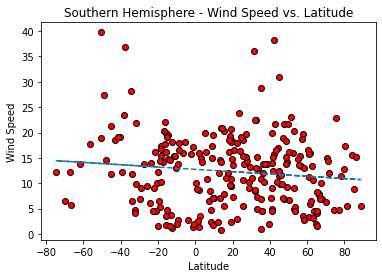

In [261]:
# Select specified data
latitudes = sh_cities["Lat"]
wind_speed = sh_cities["Wind Speed"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, wind_speed)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()